In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("Game_sales_cleaned.csv")
df

,Game_sale_index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16286,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16287,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16288,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16289,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
Platform_sales = df['Platform'].value_counts().head(10)
Platform_sales

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
Name: count, dtype: int64

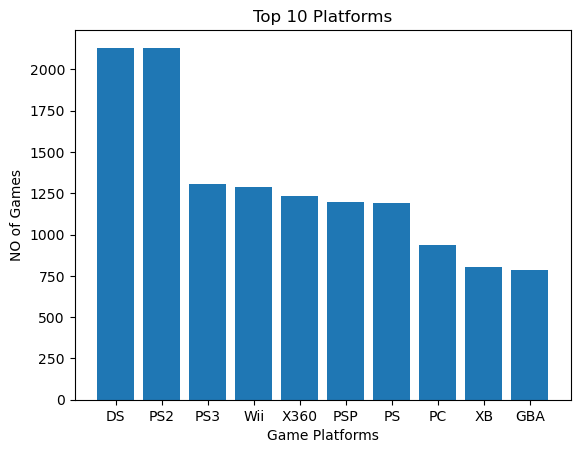

In [5]:
plt.bar(Platform_sales.index, Platform_sales) 
plt.xlabel('Game Platforms')
plt.ylabel('NO of Games')
plt.title('Top 10 Platforms')
plt.show()

In Horizontal bar graph

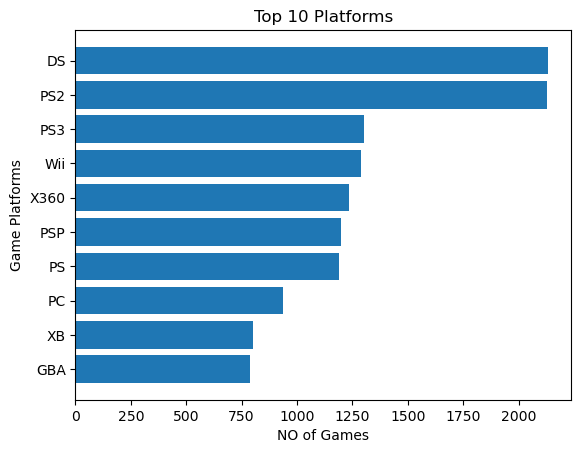

In [6]:
plt.barh(Platform_sales.index, Platform_sales) 
plt.gca().invert_yaxis()
plt.ylabel('Game Platforms')
plt.xlabel('NO of Games')
plt.title('Top 10 Platforms')
plt.show()

Available genres:
1. Action
2. Adventure
3. Fighting
4. Misc
5. Platform
6. Puzzle
7. Racing
8. Role-Playing
9. Shooter
10. Simulation
11. Sports
12. Strategy


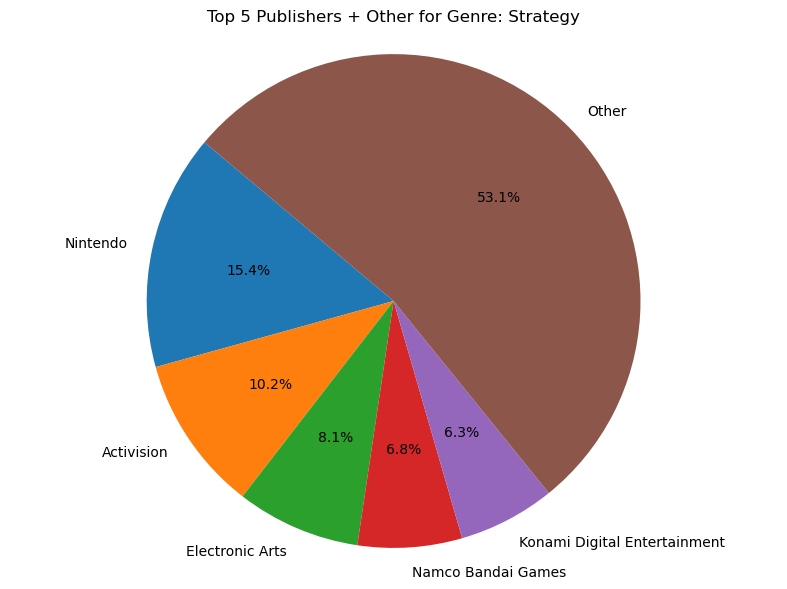

In [8]:



# Get unique genres
genre_list = sorted(df['Genre'].dropna().unique().tolist())

# Display available genres
print("Available genres:")
for idx, genre in enumerate(genre_list, start=1):
    print(f"{idx}. {genre}")

# Ask user to choose a genre
selected_genre = input("\nEnter the genre exactly as shown above: ")

# Validate genre input
if selected_genre not in genre_list:
    print("Invalid genre selected. Please run the program again and enter a valid genre.")
    exit()

# Filter data by selected genre
filtered_df = df[df['Genre'] == selected_genre]

# Group by Publisher and sum Global Sales
publisher_sales = (
    filtered_df.groupby("Publisher")["Global_Sales"]
    .sum()
    .reset_index()
    .sort_values(by="Global_Sales", ascending=False)
)

# Get Top 5 and calculate 'Other'
top5 = publisher_sales.head(5)
other_sales = publisher_sales.iloc[5:]["Global_Sales"].sum()

# Combine Top 5 with 'Other'
top5_plus_other = pd.concat(
    [top5, pd.DataFrame([{"Publisher": "Other", "Global_Sales": other_sales}])],
    ignore_index=True
)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    top5_plus_other["Global_Sales"],
    labels=top5_plus_other["Publisher"],
    autopct="%1.1f%%",
    startangle=140
)
plt.title(f"Top 5 Publishers + Other for Genre: {selected_genre}")
plt.axis("equal")
plt.tight_layout()
plt.show()
